In [1]:
import numpy as np
import matplotlib.pyplot as plt

Рассмотрим уравнение:
$$x_{t+1} = r\cdot x_t \cdot (1 - x_t)$$

Это простое рекуррентное уравнение, которое приблизительно, но достаточно хорошо описывает размножение кроликов в некоторой среде. За $x_t$ принимается количество кроликов в год $t$, коэффициент $r$ обозначает количество приплода на одного кролика на следующий год. Понятно, что в таком случае каждый кролик принесёт $r \cdot x_t$ кроликов. Однако чем больше кроликов, тем быстрее они съедают траву вокруг себя и если кроликов становится слишком много, то им не хватает на всех еды. И гибель кроликов от недостатка еды в некоторый год обозначается сомножителем $(1-x_t)$. Здесь $1$ это некоторый теоретический предел количества кроликов в данной среде, а величины $x_t$ измеряются в долях от этой теоретической величины.

Понаблюдаем за кроликами на протяжении 100 лет (шагов) и посмотрим, как меняется их количество с течением времени для разных начальных значений $x_t$. Возьмём для начала $r=1$

In [52]:
r = 1
x_inits = [i / 10 for i in range(1, 10)]
x_values_arr = []
for x_init in x_inits:
    x_values = []
    for t in range(50):
        if t == 0:
            x_values.append(x_init)
        else:
            x_values.append(x_values[-1] * r * (1 - x_values[-1]))
    x_values_arr.append(x_values)

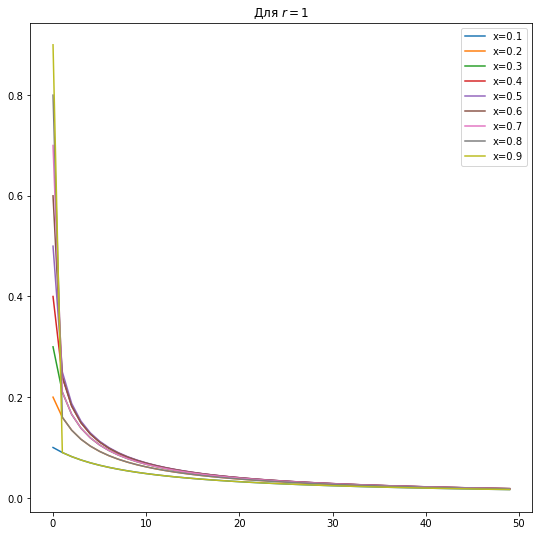

In [53]:
fig = plt.figure(figsize=(9,9))
for i in range(9):
    plt.plot(range(50), x_values_arr[i], label="x={}".format(x_inits[i]))
plt.legend()
plt.title("Для $r=1$")
plt.show()

Теперь построим аналогичное для $r = 2$

In [54]:
r = 2
x_inits = [i / 10 for i in range(1, 10)]
x_values_arr = []
for x_init in x_inits:
    x_values = []
    for t in range(50):
        if t == 0:
            x_values.append(x_init)
        else:
            x_values.append(x_values[-1] * r * (1 - x_values[-1]))
    x_values_arr.append(x_values)

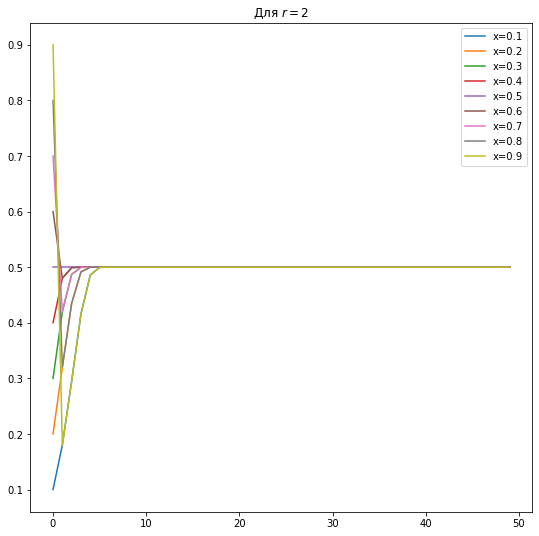

In [55]:
fig = plt.figure(figsize=(9,9))
for i in range(9):
    plt.plot(range(50), x_values_arr[i], label="x={}".format(x_inits[i]))
plt.legend()
plt.title("Для $r=2$")
plt.show()

Видно, что графики ведут себя примерно одинаково, для скорости приплода $r = 1$ кролики неизбежно вымирают, с какого бы начального состояния они не отправлялись, а для скорости приплода $r = 2$ количество кроликов быстро выходит на насыщение $0.5$ от теоретически доступной популяции на этой территории и дальше не меняется. Поскольку графики ведут себя одинаково, возьмём дальше какое-то начальное состояние, например, $x_0 = 0.3$ и попытаемся теперь варьировать $r$. Дальше напишем вспомогательную функцию, чтобы каждый раз заново не переписывать цикл.

In [56]:
def simulate(r=2, years=50, x0=0.3):
    res = []
    for t in range(years):
        if t == 0:
            res.append(x0)
        else:
            res.append(res[-1] * r * (1 - res[-1]))
    return res

In [57]:
r2_5 = simulate(r=2.5)
r3 = simulate(r=3)
r3_3 = simulate(r=3.3)

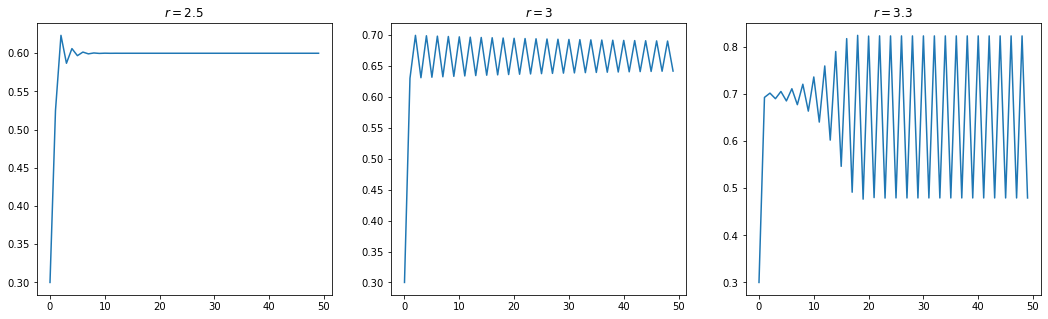

In [63]:
labels = ["$r=2.5$", "$r=3$", "$r=3.3$"]
fig, axi = plt.subplots(ncols=3, figsize=(18, 5))
for ax, sim, label in zip(axi, (r2_5, r3, r3_3), labels):
    ax.plot(range(50), sim)
    ax.set_title(label)
plt.show()

Дальше - больше!

In [64]:
r3_4 = simulate(r=3.4)
r3_5 = simulate(r=3.5)
r3_6 = simulate(r=3.6)

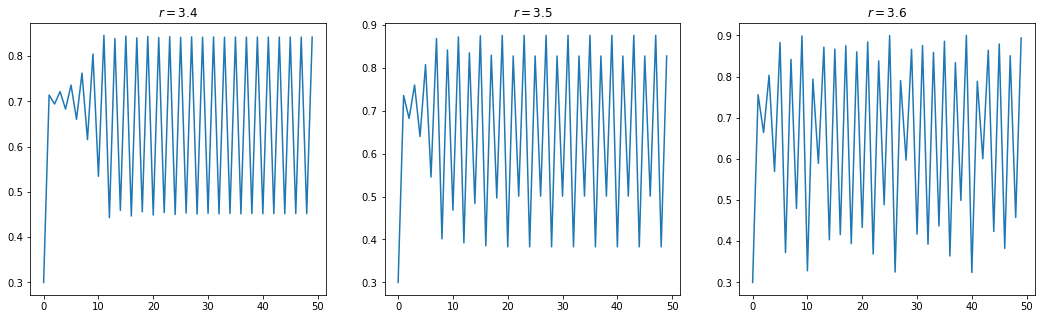

In [65]:
labels = ["$r=3.4$", "$r=3.5$", "$r=3.6$"]
fig, axi = plt.subplots(ncols=3, figsize=(18, 5))
for ax, sim, label in zip(axi, (r3_4, r3_5, r3_6), labels):
    ax.plot(range(50), sim)
    ax.set_title(label)
plt.show()

После значения $r=3.57$ колебания становятся *абсолютно непредсказуемыми* и кажется, будто они случайны. Однако, обратите внимание, что это абсолютно детерминистическое уравнение. Каждая следующая итерация целиком и полностью зависит от предыдущей и мы можем рассчитать её. Но предсказать не можем, в ней нет регулярности. Единственный способ её предсказать - это рассчитать её от начала и до конца.